In [41]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [42]:
def tonality_PCs_complition(G):
    additions = {}
    for n in G.nodes():
        if 'CHORD' in n:
            # get descendants
            c = nx.descendants(G, n)
            # get root and type rpcs
            r = -1
            type_rpcs = []
            for d in c:
                if 'ROOT_PC:' in d:
                    root_pc_split = d.split('ROOT_PC:')
                    r = int(root_pc_split[1])
                if 'TYPE_PC:' in d:
                    type_pc_split = d.split('TYPE_PC:')
                    type_rpcs.append( int(type_pc_split[1]) )
            if r > -1 and len(type_rpcs) > 0:
                chord_pcs = [r]
                for t in type_rpcs:
                    chord_pcs.append( (r + t)%12 )
                additions[n] = {'chord_prefix': root_pc_split[0], 'chord_pcs':chord_pcs}
    # pass additions to identified chord
    for k in additions.keys():
        for v in additions[k]['chord_pcs']:
            tmp_node_name = additions[k]['chord_prefix'] + 'TONALITY_PC:' + str(v)
            G.add_node( tmp_node_name )
            G.add_edge( k, tmp_node_name, label='HAS:TONALITY_PC' )
# end tonality_PCs_complition

In [43]:
perfect_df = pd.read_csv('perfect_graph_1.csv')
print(perfect_df.head())

          head     relation          tail
0  CAD:Perfect          HAS      1stCHORD
1  CAD:Perfect          HAS      2ndCHORD
2     1stCHORD  HAS:ROOT_PC  C1_ROOT_PC:7
3     1stCHORD  HAS:TYPE_PC  C1_TYPE_PC:4
4     1stCHORD  HAS:TYPE_PC  C1_TYPE_PC:7


In [44]:
phrygian_df = pd.read_csv('phrygian_graph_1.csv')
print(phrygian_df.head())

           head     relation           tail
0  CAD:Phrygian          HAS       1stCHORD
1  CAD:Phrygian          HAS       2ndCHORD
2      1stCHORD  HAS:ROOT_PC  C1_ROOT_PC:10
3      1stCHORD  HAS:TYPE_PC   C1_TYPE_PC:0
4      1stCHORD  HAS:TYPE_PC   C1_TYPE_PC:3


In [45]:
# Create a knowledge graph
G_perfect = nx.DiGraph()
for _, row in perfect_df.iterrows():
    G_perfect.add_edge(row['head'], row['tail'], label=row['relation'])

In [46]:
# Create a knowledge graph
G_phrygian = nx.DiGraph()
for _, row in phrygian_df.iterrows():
    G_phrygian.add_edge(row['head'], row['tail'], label=row['relation'])

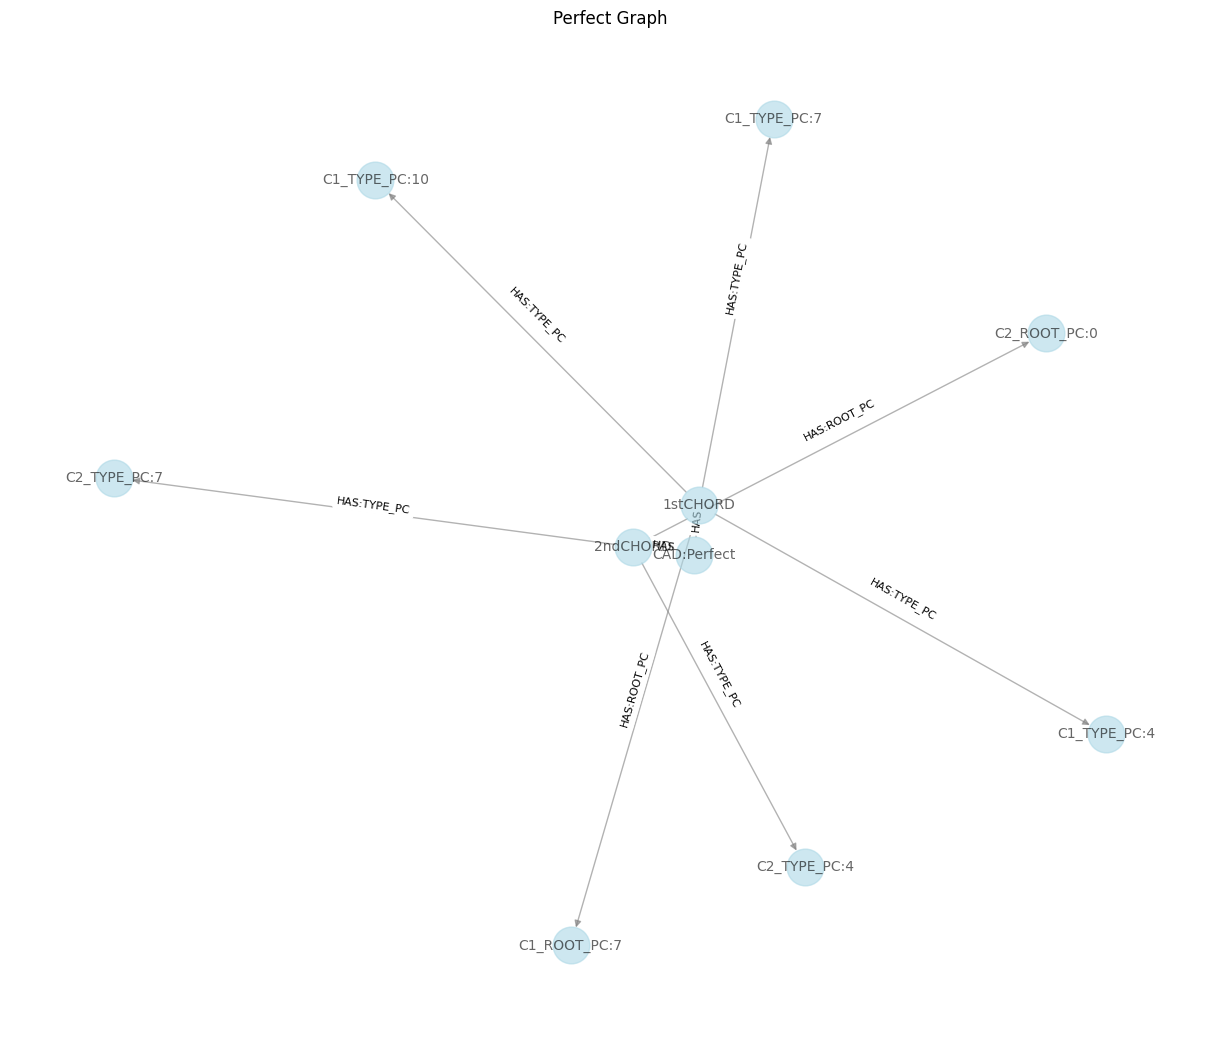

In [47]:
# Visualize the knowledge graph
# pos = nx.spring_layout(G, seed=42, k=0.9)
pos = nx.spring_layout(G_perfect)
labels = nx.get_edge_attributes(G_perfect, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G_perfect, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G_perfect, pos, edge_labels=labels, font_size=8, label_pos=0.5, verticalalignment='baseline')
plt.title('Perfect Graph')
plt.show()

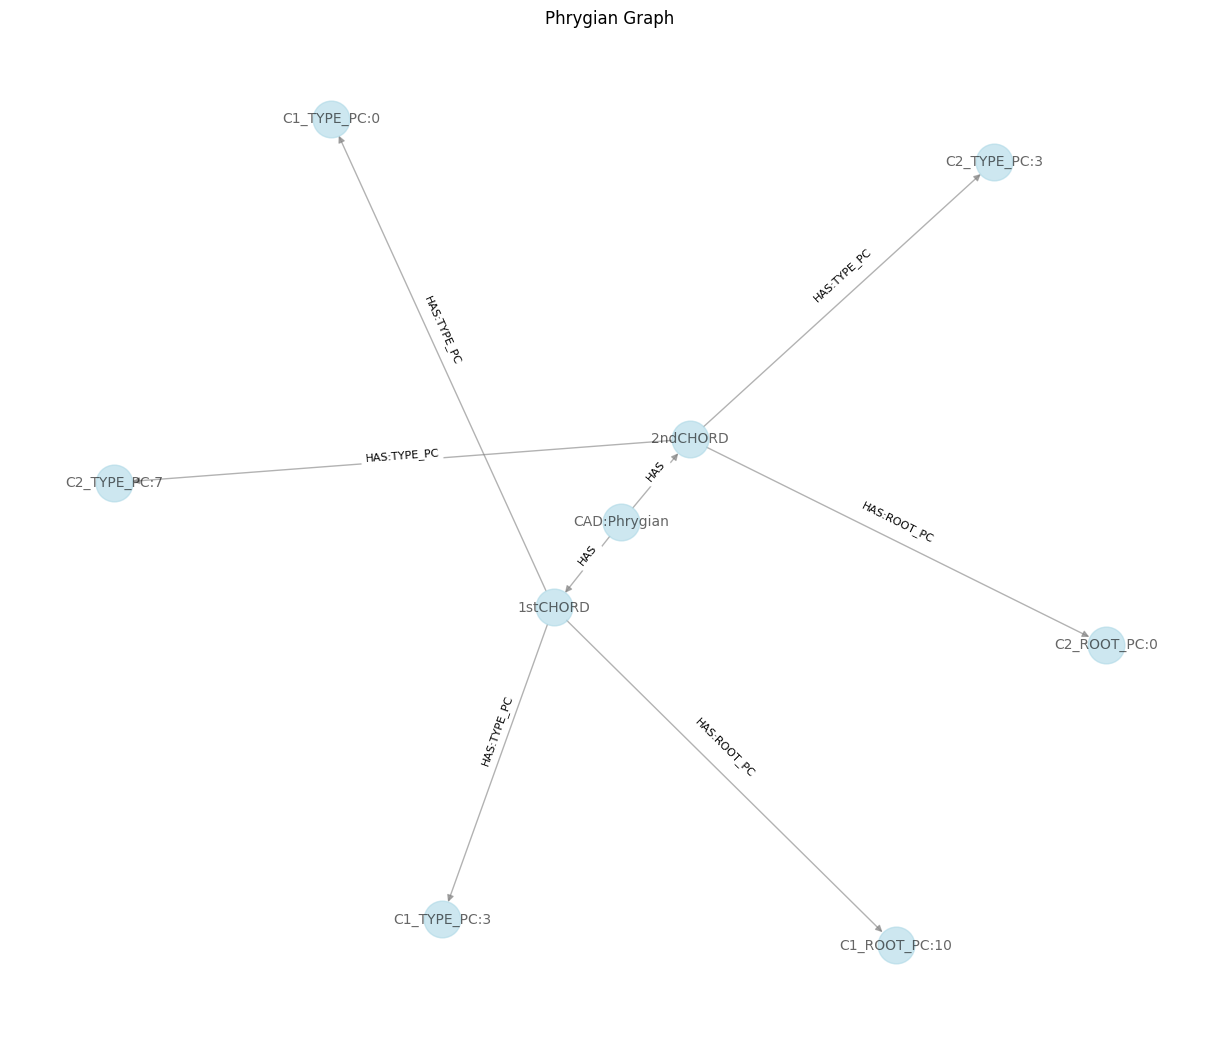

In [48]:
# Visualize the knowledge graph
# pos = nx.spring_layout(G, seed=42, k=0.9)
pos = nx.spring_layout(G_phrygian)
labels = nx.get_edge_attributes(G_phrygian, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G_phrygian, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G_phrygian, pos, edge_labels=labels, font_size=8, label_pos=0.5, verticalalignment='baseline')
plt.title('Phrygian Graph')
plt.show()

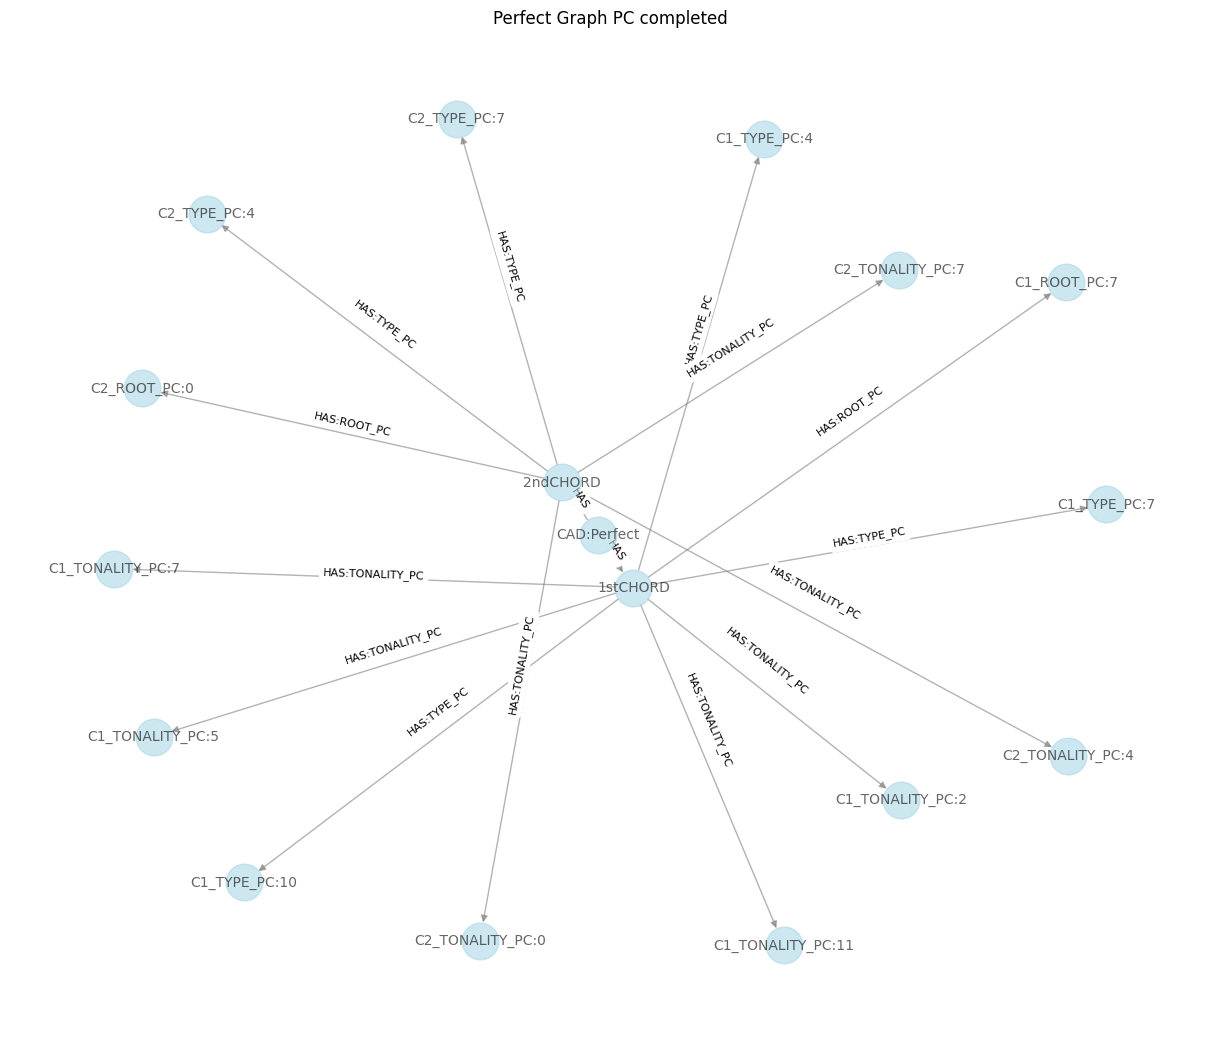

In [49]:
# tonality complition
tonality_PCs_complition(G_perfect)
# Visualize the knowledge graph
# pos = nx.spring_layout(G, seed=42, k=0.9)
pos = nx.spring_layout(G_perfect)
labels = nx.get_edge_attributes(G_perfect, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G_perfect, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G_perfect, pos, edge_labels=labels, font_size=8, label_pos=0.5, verticalalignment='baseline')
plt.title('Perfect Graph PC completed')
plt.show()

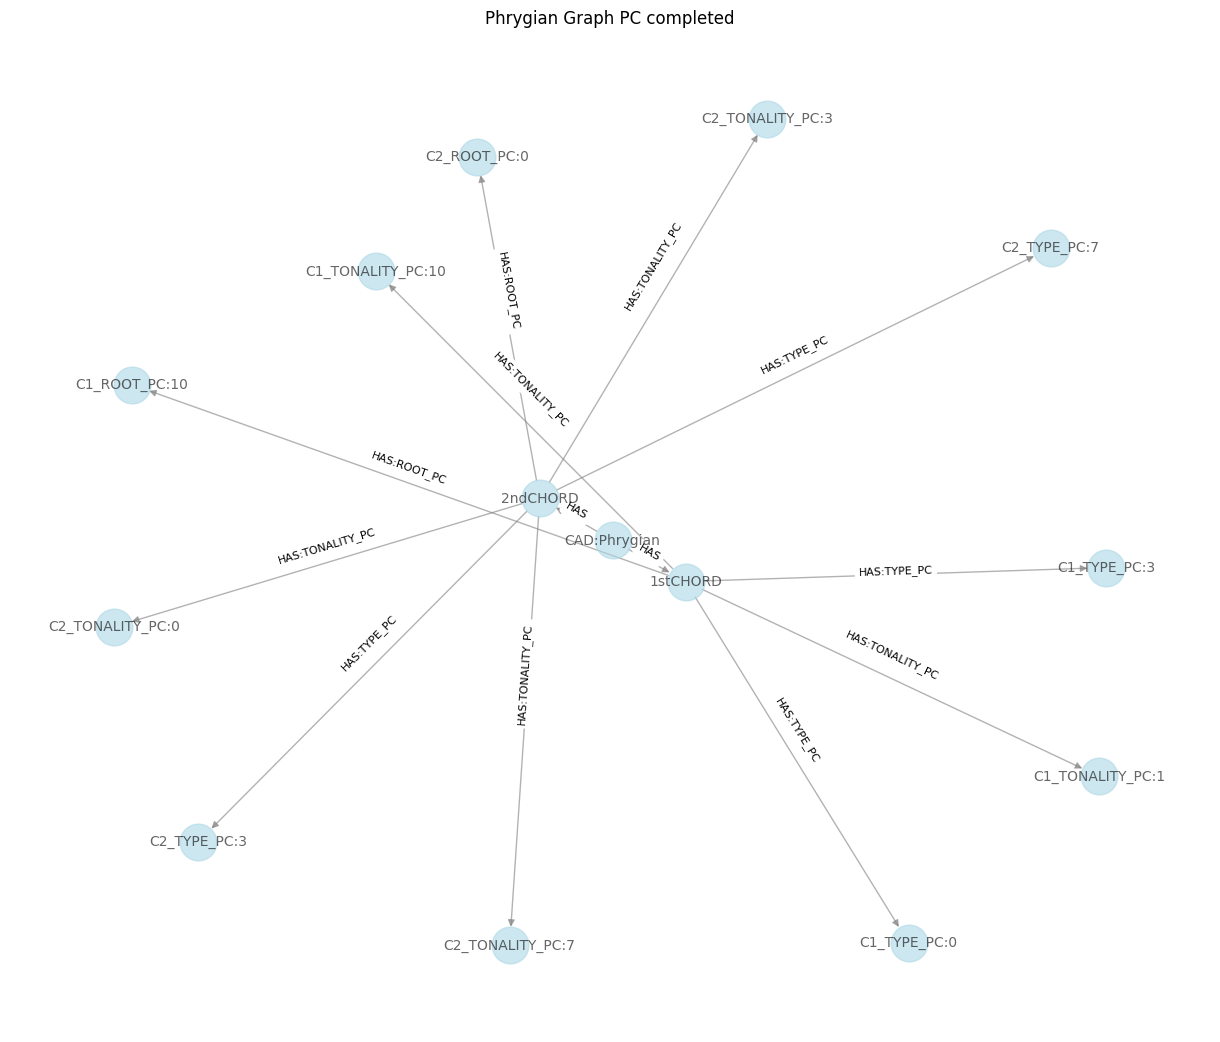

In [50]:
# tonality complition
tonality_PCs_complition(G_phrygian)
# Visualize the knowledge graph
# pos = nx.spring_layout(G, seed=42, k=0.9)
pos = nx.spring_layout(G_phrygian)
labels = nx.get_edge_attributes(G_phrygian, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G_phrygian, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G_phrygian, pos, edge_labels=labels, font_size=8, label_pos=0.5, verticalalignment='baseline')
plt.title('Phrygian Graph PC completed')
plt.show()

In [51]:
# intersection
I_perfect_phrygian = nx.intersection(G_perfect, G_phrygian)

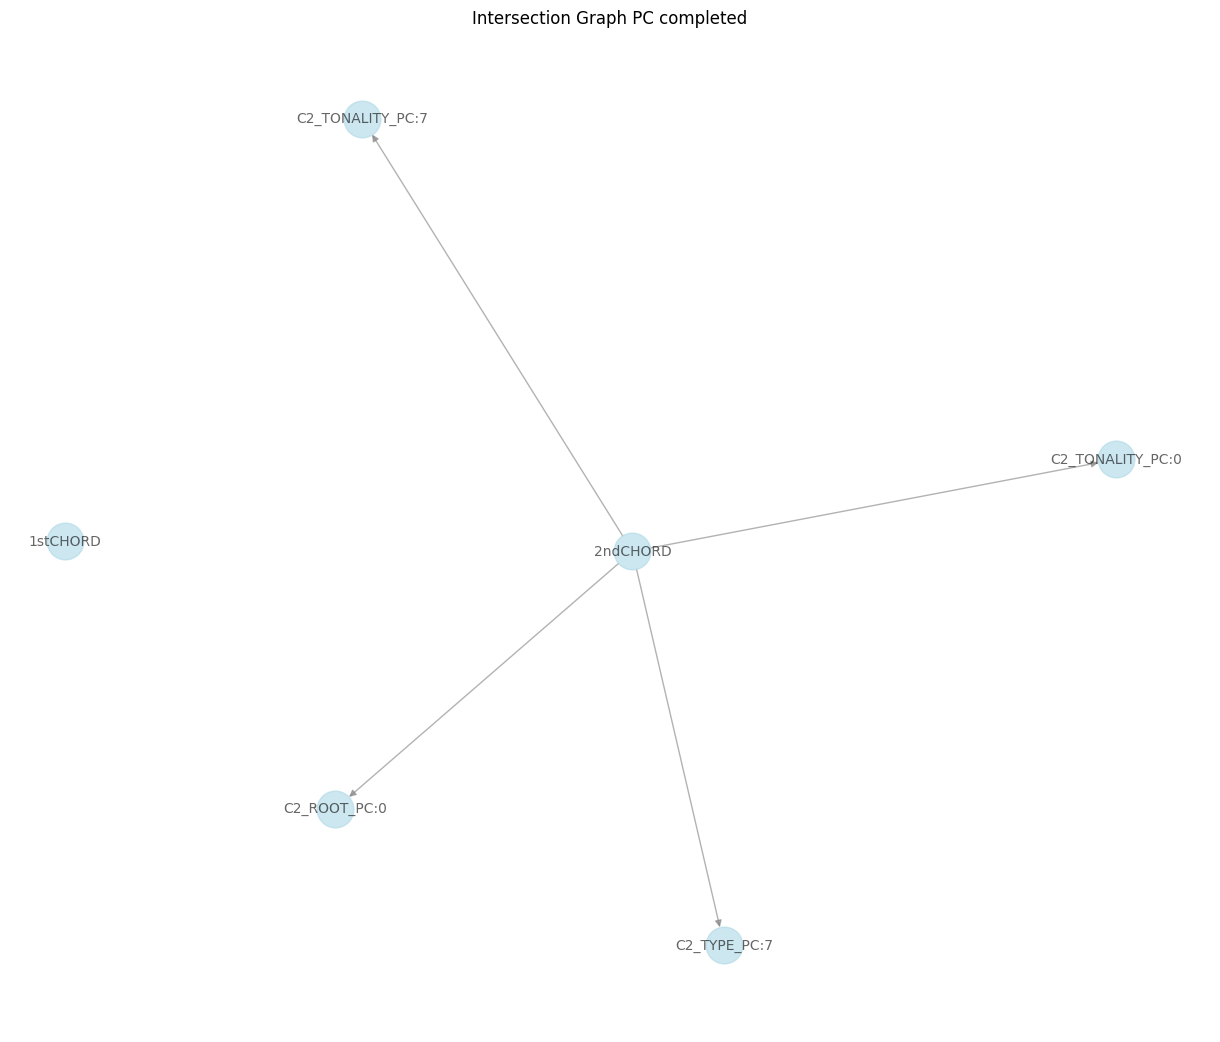

In [52]:
pos = nx.spring_layout(I_perfect_phrygian)
labels = nx.get_edge_attributes(I_perfect_phrygian, 'label')
plt.figure(figsize=(12, 10))
nx.draw(I_perfect_phrygian, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(I_perfect_phrygian, pos, edge_labels=labels, font_size=8, label_pos=0.5, verticalalignment='baseline')
plt.title('Intersection Graph PC completed')
plt.show()